# Enrolments Data

## Exploration
### Statistical exploration

#### Reading the data, removing useless columns and adding special columns

In [1]:
import pandas as pd
import numpy as np
#Read the data
enrolments = pd.read_csv("data/courses snap_sales_funnel 2017-07-05T1254.csv",low_memory=False)

In [2]:
enrolments.columns

Index(['Startdate', 'Enddate', 'Metro', 'Course', 'PhoneValid', 'Price',
       'Type', 'DaysEnroltoStart', 'DaysInvoicetoEnrol', 'DaysLeadtoEnroled',
       'EnrolDate', 'EnrolDay', 'EnrolHour', 'Month', 'EnrolWeek', 'Year',
       'CanceledDate', 'CanceledMonth', 'ExpectedPayment', 'PardotCategory',
       'ApplicationType', 'LeadID', 'Status', 'OppCreatedDate',
       'OppOwnerMetro', 'SpeedtoLead', 'CampaignSource',
       'CampaignSourceCategory'],
      dtype='object')

##### Columns
- 'Startdate' = Enrolment course start date
- 'Enddate'= Enrolment course end date
- 'Metro' = Enrolment course location
- 'Course' = Enrolment course (WDi, DAT, etc.)
- 'PhoneValid' = Whether enrolment has valid phone number
- 'Price' = Enrolment course price
- 'Type' = Enrolment course type (immersive, part-time, remote)
- 'DaysEnroltoStart' = Days between enrolment and course start date
- 'DaysInvoicetoEnrol'= Days between invoice and enrolment
- 'DaysLeadtoEnroled' = Days between lead entry (e.g. website visit) to enrolment
- 'EnrolDate' = Date of enrolment
- 'EnrolDay' = Day (of the week) of enrolment
- 'EnrolHour' = Hour of enrolment
- 'Month' = Month of enrolment
- 'EnrolWeek' = Week of enrolment
- 'Year' = Year of enrolment
- 'CanceledDate' = Date cancelled
- 'CanceledMonth' = Month cancelled
- 'ExpectedPayment' = Method of expected payment (e.g. employer paid, personal loan, etc.)
- 'PardotCategory' = Category of lead - how did they enter our system?
- 'ApplicationType' = Type of application
- 'LeadID' = ID of lead
- 'Status'= Status of lead
- 'OppCreatedDate' = Date lead creation
- 'OppOwnerMetro' = Metro of lead creation
- 'SpeedtoLead' = Time taken to contact lead
- 'CampaignSource' = Source of campaign
- 'CampaignSourceCategory' = Category of source of campaign

In [3]:
enrolments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50407 entries, 0 to 50406
Data columns (total 28 columns):
Startdate                 50407 non-null int64
Enddate                   50407 non-null int64
Metro                     50407 non-null object
Course                    50407 non-null object
PhoneValid                50407 non-null object
Price                     50406 non-null float64
Type                      50407 non-null object
DaysEnroltoStart          46003 non-null float64
DaysInvoicetoEnrol        50407 non-null int64
DaysLeadtoEnroled         50407 non-null int64
EnrolDate                 50407 non-null int64
EnrolDay                  50407 non-null object
EnrolHour                 50407 non-null int64
Month                     50407 non-null int64
EnrolWeek                 50407 non-null int64
Year                      50407 non-null int64
CanceledDate              9327 non-null float64
CanceledMonth             9327 non-null float64
ExpectedPayment           38772 no

In [4]:
#Remove some useless columns
enrolments.drop('Status', axis=1, inplace=True)
enrolments.drop('CampaignSourceCategory',axis=1,inplace=True)
enrolments.drop('CampaignSource',axis=1,inplace=True)
enrolments.drop('OppOwnerMetro', axis=1, inplace=True)
enrolments.drop('OppCreatedDate', axis=1, inplace=True)
enrolments.drop('LeadID', axis=1, inplace=True)
enrolments.columns

Index(['Startdate', 'Enddate', 'Metro', 'Course', 'PhoneValid', 'Price',
       'Type', 'DaysEnroltoStart', 'DaysInvoicetoEnrol', 'DaysLeadtoEnroled',
       'EnrolDate', 'EnrolDay', 'EnrolHour', 'Month', 'EnrolWeek', 'Year',
       'CanceledDate', 'CanceledMonth', 'ExpectedPayment', 'PardotCategory',
       'ApplicationType', 'SpeedtoLead'],
      dtype='object')

In [5]:
#Add cancelled column to track whether an enrolment cancelled
enrolments['Cancelled'] = enrolments.CanceledDate.notnull()

In [6]:
enrolments.drop('CanceledDate', axis=1, inplace=True)

In [7]:
enrolments.columns

Index(['Startdate', 'Enddate', 'Metro', 'Course', 'PhoneValid', 'Price',
       'Type', 'DaysEnroltoStart', 'DaysInvoicetoEnrol', 'DaysLeadtoEnroled',
       'EnrolDate', 'EnrolDay', 'EnrolHour', 'Month', 'EnrolWeek', 'Year',
       'CanceledMonth', 'ExpectedPayment', 'PardotCategory', 'ApplicationType',
       'SpeedtoLead', 'Cancelled'],
      dtype='object')

In [8]:
#Add an APAC column
enrolments['APAC'] = enrolments['Metro'].isin(['sydney','melbourne','hong-kong','singapore','brisbane'])

In [9]:
enrolments.APAC.value_counts()

False    42530
True      7877
Name: APAC, dtype: int64

In [10]:
#Limit to only post mid-2014 data and pre mid-2017 data
enrolments = enrolments[enrolments.EnrolDate > 20140630]
enrolments = enrolments[enrolments.Startdate < 20170630]

In [11]:
#Cancellations are enroled before their course starts, so daysenroltostart must be positive
enrolments = enrolments[enrolments.DaysEnroltoStart > 0]

In [12]:
#Checkout all the numeric columns
#enrolments.info()
#enrolments.describe()
enrolments.shape

(33436, 23)

#### Dealing with null values

In [13]:
enrolments.isnull().sum()

Startdate                 0
Enddate                   0
Metro                     0
Course                    0
PhoneValid                0
Price                     0
Type                      0
DaysEnroltoStart          0
DaysInvoicetoEnrol        0
DaysLeadtoEnroled         0
EnrolDate                 0
EnrolDay                  0
EnrolHour                 0
Month                     0
EnrolWeek                 0
Year                      0
CanceledMonth         29861
ExpectedPayment        3139
PardotCategory          667
ApplicationType           0
SpeedtoLead           23255
Cancelled                 0
APAC                      0
dtype: int64

In [14]:
enrolments.CanceledMonth.fillna("None", inplace=True)
enrolments.Price.fillna(0, inplace=True)

In [15]:
enrolments.PardotCategory.fillna("Unknown", inplace=True)
enrolments.PardotCategory.value_counts()

GA Course Leads                15701
Website                         5051
CWE Purchase                    4066
Facebook Acquisition            1400
Other                           1239
GA Dash                         1226
Sweepstake                      1107
Unknown                          677
GA Front Row Signup              474
Partner Event                    410
Twitter Promoted                 376
GA Circuits Leads                313
Twitter Acquisition              202
Uncategorized                    183
Student Enrollment               140
Content Partnership              127
Livestream Purchase              124
Scholarship                       92
CWE Walk Ins                      81
Partner Livestream                81
Global Acquisition Campaign       73
Free Front Row Trial Local        53
GA Content                        42
GA Event                          29
Social Organic                    29
GA Blog                           25
LinkedIn Acquisition              24
L

In [16]:
#enrolments.DaysEnroltoStart.mean()
enrolments.DaysEnroltoStart.fillna(enrolments.DaysEnroltoStart.mean(), inplace=True)

In [17]:
#enrolments.SpeedtoLead.value_counts()
enrolments.SpeedtoLead.fillna(enrolments.SpeedtoLead.mean(), inplace=True)

In [18]:
enrolments['ExpectedPayment'] = enrolments.ExpectedPayment.map({
    'Student / Self': 'Student / Self',
    'Student (self)': 'Student / Self',
    'Employer': 'Employer',
    'Loan (Partner, please note)': 'Loan Partner',
    'Veterans Affairs': 'Veterans Affairs',
    'Employer Bulk Pre-paid': 'Employer',
    'Scholarship (Opportunity Fund)': 'Scholarship',
    'Loan Partner (please note)': 'Loan Partner',
    'Family':'Family',
    'Other (please note)':'Other',
    'GA Employee/Instructor':'GA Employee/Instructor',
    'Loan (Private Bank, please note)':'Loan (Private)',
    'Government Funding / Grant':'Government Funding / Grant',
    'Other':'Other',
    'CourseHorse':'Other',
    'Opportunity Fund':'Scholarship',
    'Enterprise Credit':'Other',
    'Scholarship (GA Partner, please note)':'Scholarship',
    'Scholarship (Other, please note)':'Scholarship',
})
enrolments.ExpectedPayment.fillna("Unknown", inplace=True)
enrolments.ExpectedPayment.value_counts()

Student / Self                24799
Employer                       3268
Unknown                        3139
Loan Partner                   1609
Veterans Affairs                176
Scholarship                     142
Family                           88
Other                            77
Loan (Private)                   50
Government Funding / Grant       48
GA Employee/Instructor           40
Name: ExpectedPayment, dtype: int64

In [19]:
enrolments.isnull().sum()

Startdate             0
Enddate               0
Metro                 0
Course                0
PhoneValid            0
Price                 0
Type                  0
DaysEnroltoStart      0
DaysInvoicetoEnrol    0
DaysLeadtoEnroled     0
EnrolDate             0
EnrolDay              0
EnrolHour             0
Month                 0
EnrolWeek             0
Year                  0
CanceledMonth         0
ExpectedPayment       0
PardotCategory        0
ApplicationType       0
SpeedtoLead           0
Cancelled             0
APAC                  0
dtype: int64

#### Streamlining multiple categories

In [20]:
#Checkout only the more common application types
#enrolments.ApplicationType.value_counts()<100

In [21]:
commonapptypes = enrolments.ApplicationType.value_counts().index[enrolments.ApplicationType.value_counts()>147]
commonapptypes

Index(['apply now', 'request info', 'info session', 'referral', 'invoice',
       'contact_admissions', 'get notified', 'financing contact us',
       'cwe_feedback', 'trial class', 'lander', 'open house'],
      dtype='object')

In [22]:
enrolments = enrolments[enrolments.ApplicationType.isin(commonapptypes)]
enrolments.shape

(32221, 23)

In [23]:
enrolments.ApplicationType.value_counts()

apply now               11139
request info            10815
info session             6824
referral                  780
invoice                   494
contact_admissions        446
get notified              424
financing contact us      372
cwe_feedback              369
trial class               245
lander                    165
open house                148
Name: ApplicationType, dtype: int64

In [24]:
#Checkout only the more common Pardot types
#enrolments.PardotCategory.value_counts()>100
commonpdtypes = enrolments.PardotCategory.value_counts().index[enrolments.PardotCategory.value_counts()>100]
commonpdtypes

Index(['GA Course Leads', 'Website', 'CWE Purchase', 'Facebook Acquisition',
       'Other', 'GA Dash', 'Sweepstake', 'Unknown', 'GA Front Row Signup',
       'Partner Event', 'Twitter Promoted', 'GA Circuits Leads',
       'Twitter Acquisition', 'Uncategorized', 'Student Enrollment',
       'Livestream Purchase', 'Content Partnership'],
      dtype='object')

In [25]:
enrolments = enrolments[enrolments.PardotCategory.isin(commonpdtypes)]
enrolments.shape

(31654, 23)

In [26]:
enrolments.PardotCategory.value_counts()

GA Course Leads         15358
Website                  4858
CWE Purchase             3863
Facebook Acquisition     1356
Other                    1183
GA Dash                  1162
Sweepstake               1062
Unknown                   605
GA Front Row Signup       460
Partner Event             392
Twitter Promoted          359
GA Circuits Leads         259
Twitter Acquisition       196
Uncategorized             181
Student Enrollment        122
Content Partnership       119
Livestream Purchase       119
Name: PardotCategory, dtype: int64

In [27]:
commoncourses = enrolments.Course.value_counts().index[enrolments.Course.value_counts()>100]
commoncourses
enrolments = enrolments[enrolments.Course.isin(commoncourses)]
enrolments.shape

(31545, 23)

In [28]:
enrolments.PhoneValid.unique()
enrolments['PhoneValid'] = enrolments.PhoneValid.map({'Yes': 1,'No': 0})

In [29]:
enrolments.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31545 entries, 758 to 42687
Data columns (total 23 columns):
Startdate             31545 non-null int64
Enddate               31545 non-null int64
Metro                 31545 non-null object
Course                31545 non-null object
PhoneValid            31545 non-null int64
Price                 31545 non-null float64
Type                  31545 non-null object
DaysEnroltoStart      31545 non-null float64
DaysInvoicetoEnrol    31545 non-null int64
DaysLeadtoEnroled     31545 non-null int64
EnrolDate             31545 non-null int64
EnrolDay              31545 non-null object
EnrolHour             31545 non-null int64
Month                 31545 non-null int64
EnrolWeek             31545 non-null int64
Year                  31545 non-null int64
CanceledMonth         31545 non-null object
ExpectedPayment       31545 non-null object
PardotCategory        31545 non-null object
ApplicationType       31545 non-null object
SpeedtoLead      

In [34]:
#Percentage of enrolments that cancel:
enrolments.Cancelled.value_counts()
7177/(7717+32553)

0.17822200148994288

#### Pandas profile

In [35]:
#!pip install pandas-profiling

In [36]:
#import pandas_profiling
#apandas_profiling.ProfileReport(enrolments)

### Visualisation

In [37]:
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
import urllib
import plotly
plotly.__version__

%matplotlib inline
sns.set(color_codes=True)

/anaconda/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning:

using a non-integer number instead of an integer will result in an error in the future



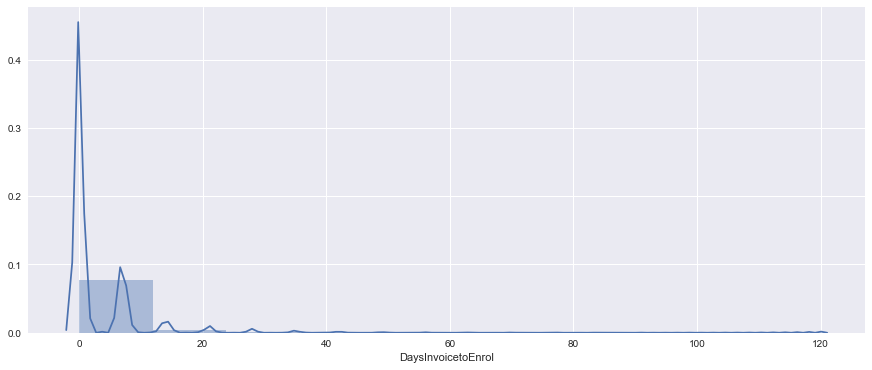

In [38]:
plt.figure(figsize = (15,6))
sns.distplot(enrolments.DaysInvoicetoEnrol, bins=10)

/anaconda/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning:

using a non-integer number instead of an integer will result in an error in the future



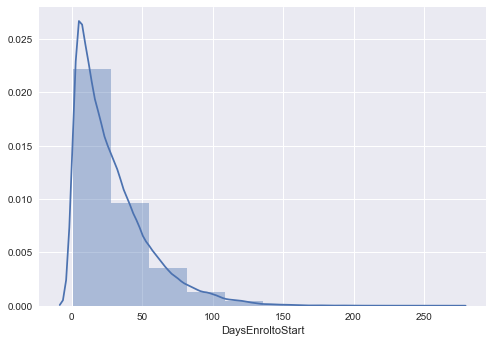

In [39]:
sns.distplot(enrolments.DaysEnroltoStart, bins=10)

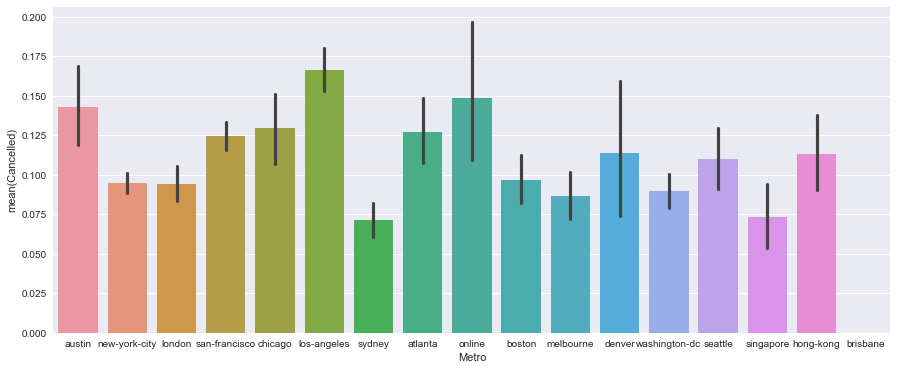

In [40]:
plt.figure(figsize = (15,6))
sns.barplot(x='Metro', y = 'Cancelled', data = enrolments)

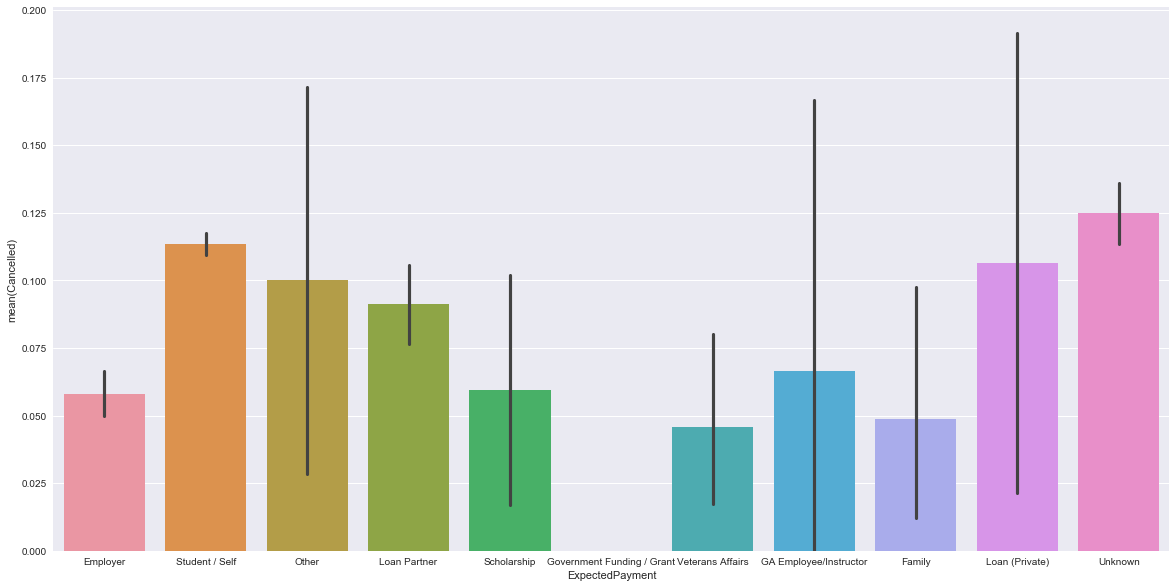

In [41]:
plt.figure(figsize = (20,10))
sns.barplot(x='ExpectedPayment', y = 'Cancelled', data = enrolments)

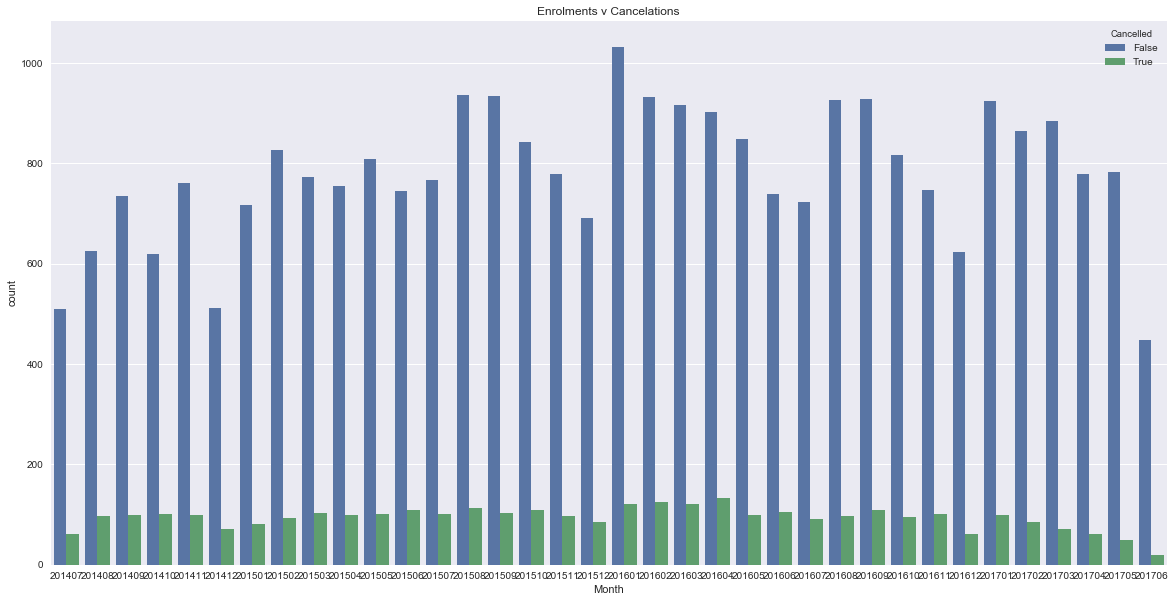

In [42]:
plt.figure(figsize=(20,10))
plt.title("Enrolments v Cancelations")
sns.countplot(x='Month', hue='Cancelled', data = enrolments)

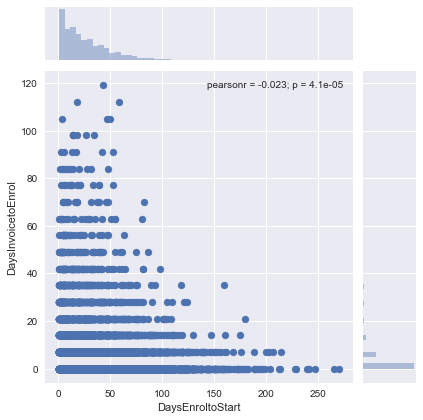

In [43]:
sns.jointplot(x='DaysEnroltoStart', y="DaysInvoicetoEnrol", data=enrolments)

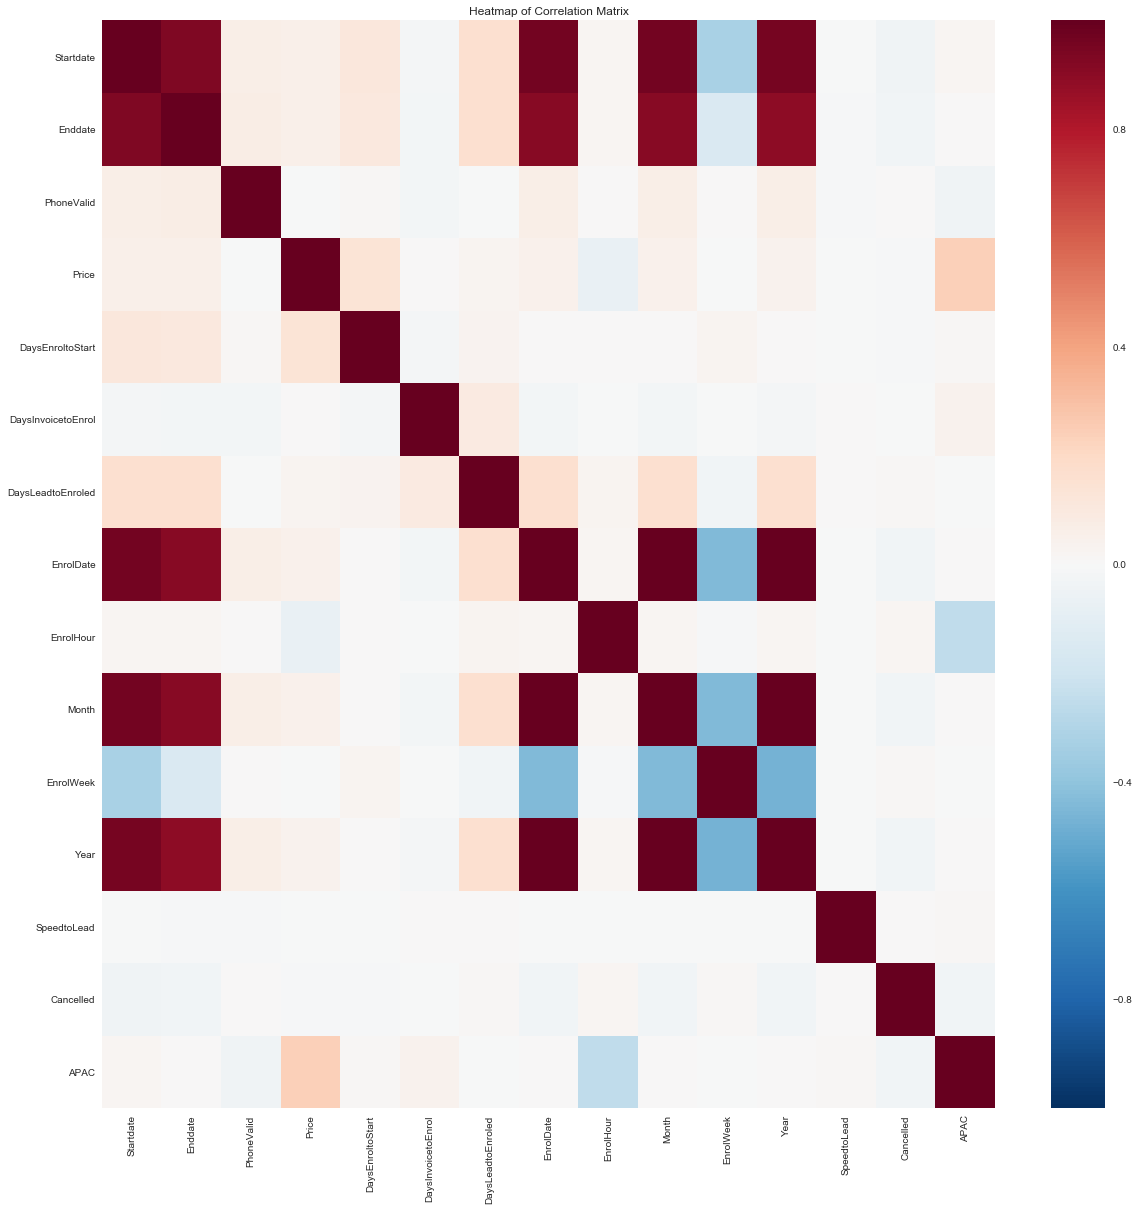

In [44]:
corr = enrolments.corr()
corr = (corr)
plt.figure(figsize = (20,20))
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
sns.plt.title('Heatmap of Correlation Matrix')

## Running dummy data
- These columns have text outputs:
 - Metro: object
 - Course: object
 - Type: object
 - EnrolDay: object
 - ExpectedPayment: object
 - ApplicationType: object
 - PardotCategory: object

In [45]:
enrolments.drop('CanceledMonth', axis=1, inplace=True)
enrolments.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31545 entries, 758 to 42687
Data columns (total 22 columns):
Startdate             31545 non-null int64
Enddate               31545 non-null int64
Metro                 31545 non-null object
Course                31545 non-null object
PhoneValid            31545 non-null int64
Price                 31545 non-null float64
Type                  31545 non-null object
DaysEnroltoStart      31545 non-null float64
DaysInvoicetoEnrol    31545 non-null int64
DaysLeadtoEnroled     31545 non-null int64
EnrolDate             31545 non-null int64
EnrolDay              31545 non-null object
EnrolHour             31545 non-null int64
Month                 31545 non-null int64
EnrolWeek             31545 non-null int64
Year                  31545 non-null int64
ExpectedPayment       31545 non-null object
PardotCategory        31545 non-null object
ApplicationType       31545 non-null object
SpeedtoLead           31545 non-null float64
Cancelled       

In [46]:
dummydata = pd.get_dummies(data=enrolments, columns = ['Metro','Course','Type','ExpectedPayment','ApplicationType','PardotCategory','EnrolDay'], prefix = ['Metro','Course','Type','ExpectedPayment','ApplicationType','PardotCategory','EnrolDay'] )

In [47]:
dummydata.shape

(31545, 99)

In [48]:
dummydata.columns

Index(['Startdate', 'Enddate', 'PhoneValid', 'Price', 'DaysEnroltoStart',
       'DaysInvoicetoEnrol', 'DaysLeadtoEnroled', 'EnrolDate', 'EnrolHour',
       'Month', 'EnrolWeek', 'Year', 'SpeedtoLead', 'Cancelled', 'APAC',
       'Metro_atlanta', 'Metro_austin', 'Metro_boston', 'Metro_brisbane',
       'Metro_chicago', 'Metro_denver', 'Metro_hong-kong', 'Metro_london',
       'Metro_los-angeles', 'Metro_melbourne', 'Metro_new-york-city',
       'Metro_online', 'Metro_san-francisco', 'Metro_seattle',
       'Metro_singapore', 'Metro_sydney', 'Metro_washington-dc',
       'Course_android-development-immersive',
       'Course_back-end-web-development',
       'Course_business-fundamentals-tactics', 'Course_data-analytics',
       'Course_data-science', 'Course_data-science-immersive',
       'Course_digital-marketing', 'Course_front-end-web-development',
       'Course_ios-development', 'Course_javascript-development',
       'Course_product-management', 'Course_product-management-immers

## Let's try some algorithms!

### Decision Tree

In [ ]:
#dummydata.Cancelled.value_counts()

In [ ]:
#treesubset = dummydata

In [49]:
#from sklearn import tree
#from sklearn.cross_validation import train_test_split
#from sklearn import metrics
#import matplotlib.pyplot as plt

%matplotlib inline

#cancelled = treesubset['Cancelled']
#del treesubset['Cancelled']
#treesubset

In [ ]:
#X_train, X_test, y_train, y_test = train_test_split(treesubset, cancelled, random_state=1)
#ctree = tree.DecisionTreeClassifier(random_state=1, max_depth=2)
# Fit the decision tree classifier
#ctree.fit(X_train, y_train)
# Create a feature vector
#features = treesubset.columns.tolist()
#features

In [ ]:
#from io import StringIO
#out = StringIO()
#tree.export_graphviz(ctree, out_file = out)
#from sklearn.tree import export_graphviz
#export_graphviz(ctree, out_file='decisiontree.dot', feature_names=features)

#### Previously exported: 
<img src="assets/img/decisiontree-enrolments.png">

### Logistic Regression
##### Plain ol' logistic regression:

In [50]:
import pandas as pd
# data = dummydata
all_ftcolumns = dummydata.columns.tolist()
all_ftcolumns.remove('Cancelled')

In [51]:
X = dummydata[all_ftcolumns]
y = dummydata.Cancelled

In [52]:
#split the data
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import cross_val_score

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
#fit the logreg model and print the coefficients
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
zip(all_ftcolumns, logreg.coef_[0])
print(logreg.fit(X_train, y_train))

/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning:

This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)


In [53]:
#test accuracy
y_pred_class = logreg.predict(X_test)
from sklearn import metrics
print(metrics.accuracy_score(y_test,y_pred_class))

0.892354507417


In [54]:
from sklearn.dummy import DummyClassifier
dumb = DummyClassifier(strategy='most_frequent')
dumb.fit(X_train, y_train)
y_dumb_class = dumb.predict(X_test)
print (metrics.accuracy_score(y_test, y_dumb_class))

0.892354507417


* Logistic regression is as good as picking the most frequent class for all of them.


##### Cross-validation doesn't help us much more:

In [56]:
scores = cross_val_score(LogisticRegression(), X, y, scoring='accuracy', cv=10)
print(scores)

[ 0.89258555  0.89258555  0.89255151  0.8928345   0.8928345   0.8928345
  0.8928345   0.8928345   0.8928345   0.8928345 ]


In [57]:
print(scores.mean())

0.892756407936


In [58]:
#print the confusion matrix
from sklearn import metrics
prds = logreg.predict(X)
print(metrics.confusion_matrix(y_test, y_pred_class))

[[7038    0]
 [ 849    0]]


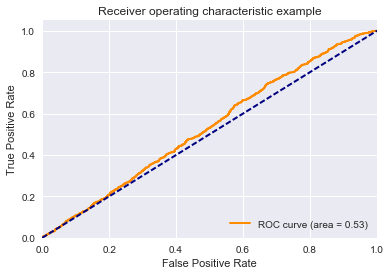

In [59]:
#generate the ROC curve
import matplotlib.pyplot as plt
# Generate the prediction values for each of the test observations using predict_proba() function rather than just predict
preds = logreg.predict_proba(X_test)[:,1]
# Store the false positive rate(fpr), true positive rate (tpr) in vectors for use in the graph
fpr, tpr, _ = metrics.roc_curve(y_test, preds)
# Store the Area Under the Curve (AUC) so we can annotate our graph with this metric
roc_auc = metrics.auc(fpr,tpr)
# Plot the ROC Curve
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()
# Our aim when modelling is to maximise the area under the curve, the closer to one the better the model.

### Regression 

In [60]:
print('RMSE (No reg.) =', np.sqrt(metrics.mean_squared_error(y_test,y_pred_class)))

RMSE (No reg.) = 0.328093725302


/anaconda/lib/python3.6/site-packages/sklearn/metrics/regression.py:232: DeprecationWarning:

numpy boolean subtract, the `-` operator, is deprecated, use the bitwise_xor, the `^` operator, or the logical_xor function instead.



In [61]:
from sklearn.linear_model import RidgeCV
alpha_range = 10.**np.arange(-5, 5)
rregcv = RidgeCV(normalize=True, scoring='neg_mean_squared_error', alphas=alpha_range)
rregcv.fit(X_train, y_train)
# Print the optimal value of Alpha for Ridge Regression
print('Optimal Alpha Value: ', rregcv.alpha_)
# Print the RMSE for the ridge regression model
preds = rregcv.predict(X_test)
print ('RMSE (Ridge CV reg.) =', np.sqrt(metrics.mean_squared_error(y_test, preds)))

Optimal Alpha Value:  0.1
RMSE (Ridge CV reg.) = 0.306581707395


In [62]:
from sklearn.linear_model import LassoCV
alpha_range = 10.**np.arange(-4, 4)
lascv = LassoCV(normalize=True, alphas=alpha_range)
lascv.fit(X_train, y_train)
print('Optimal Alpha Value: ',lascv.alpha_)
lascv.coef_
preds = lascv.predict(X_test)
print('RMSE (Lasso CV reg.) =', np.sqrt(metrics.mean_squared_error(y_test, preds)))

Optimal Alpha Value:  0.0001
RMSE (Lasso CV reg.) = 0.309485016185


In [63]:
from sklearn.linear_model import ElasticNetCV
alpha_range = 10.**np.arange(-3, 3)
enetCV = ElasticNetCV(normalize=True, alphas=alpha_range)
enetCV.fit(X_train, y_train)
print('Optimal Alpha Value: ',enetCV.alpha_)
enetCV.coef_
preds = enetCV.predict(X_test)
print('RMSE (ENET CV reg.)', np.sqrt(metrics.mean_squared_error(y_test, preds)))

Optimal Alpha Value:  100.0
RMSE (ENET CV reg.) 0.309932617905


### KNN Classifier

In [64]:
from sklearn.neighbors import KNeighborsClassifier
KNN_model = KNeighborsClassifier(5)
KNN_model.fit(X_train, y_train)
y_pred_class = KNN_model.predict(X_test)
# Print the new accuracy rate
print(metrics.accuracy_score(y_test, y_pred_class))

0.882084442754


https://svds.com/learning-imbalanced-classes/

### Random Forrest

In [65]:
#all_ftcolumns

In [66]:
from sklearn.ensemble import RandomForestClassifier
rfclf = RandomForestClassifier(n_estimators=400, max_features=2, oob_score=True, random_state=1,class_weight='balanced')
rfclf.fit(dummydata[all_ftcolumns], dummydata.Cancelled)
rfclf.oob_score_

0.89253447456015211

In [72]:
pd.DataFrame({'feature':all_ftcolumns, 'importance':rfclf.feature_importances_})

,feature,importance
0,Startdate,0.062096
1,Enddate,0.062498
2,PhoneValid,0.010055
3,Price,0.031871
4,DaysEnroltoStart,0.066910
5,DaysInvoicetoEnrol,0.023118
6,DaysLeadtoEnroled,0.068354
7,EnrolDate,0.067374
8,EnrolHour,0.061440
9,Month,0.053731


In [73]:
preds = rfclf.predict_proba(X_test)[:,1]
print('RMSE (no regularization) =', np.sqrt(metrics.mean_squared_error(y_test, preds)))

RMSE (no regularization) = 0.113607932168


## Parameter tuning?